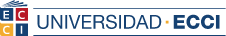
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 4 (8h): De Regresión Lineal a Machine Learning**

**Objetivos de la sesión**

---

### **Clase 1: Cómo Arreglar y Mejorar tus Modelos 🛠️**

* **Detectar Problemas**: Aprender a identificar si el modelo memoriza demasiado (**sobreajuste**) o si es demasiado simple (**subajuste**).
* **Aplicar Soluciones**: Aprender a usar técnicas de regularización (**Ridge** y **Lasso**) para controlar la complejidad del modelo y mejorar su generalización.
* **Encontrar la Mejor Versión**: Aprender a utilizar una herramienta automática (**GridSearchCV**) para descubrir la configuración óptima de un modelo.

---

### **Clase 2: Conociendo Nuevos Modelos de Clasificación 🌳**

* **Construir un Árbol de Decisión**: Aprender a crear un modelo que clasifica datos mediante reglas simples, similar a un diagrama de flujo.
* **Evaluar su Desempeño**: Aprender a medir la efectividad del árbol con la **matriz de confusión** y métricas como el **F1-Score**.
* **Interpretar y Ajustar el Árbol**: Aprender a visualizar cómo "piensa" el modelo, identificar las variables más importantes y ajustarlo para mejorar los resultados.
* **Introducción a Redes Neuronales**: Aprender qué es un **Perceptrón** y cómo funciona como la unidad fundamental de las redes neuronales.




# **Semana 8 - Clase 1**


  



---

## **El Dilema del Ajuste: Sobreajuste y Subajuste 🎯**

- **Motivación / Pregunta Problema:**
    Imaginemos que nuestro objetivo es construir un modelo para un sistema de visión artificial que clasifica piezas en una línea de producción como **"Aptas"** o **"Defectuosas"**. Si creamos un modelo demasiado simple (ej. "si la pieza es oscura, es defectuosa"), fallará constantemente porque no puede capturar la complejidad real del problema. Por otro lado, si creamos un modelo extremadamente complejo, podría empezar a memorizar detalles irrelevantes de las fotos de entrenamiento, como una mancha de aceite en la cinta transportadora, y clasificar incorrectamente piezas futuras. **¿Cómo encontramos el balance perfecto entre un modelo que no aprende lo suficiente y uno que aprende demasiado?**

- **Contexto:**
    El objetivo central del machine learning no es crear un modelo que sea perfecto con los datos pasados, sino uno que **generalice** bien a datos futuros y desconocidos. En la búsqueda de este objetivo, nos enfrentamos a dos errores comunes:

    1.  **Subajuste (*Underfitting*):** Ocurre cuando el modelo es **demasiado simple** para capturar los patrones subyacentes en los datos. No logra un buen desempeño ni siquiera con los datos de entrenamiento. Es como un estudiante que no estudió lo suficiente y, por lo tanto, reprueba tanto los ejercicios de práctica como el examen final. **El modelo tiene un sesgo alto**.

    2.  **Sobreajuste (*Overfitting*):** Ocurre cuando el modelo es **demasiado complejo** y se ajusta no solo a los patrones de los datos, sino también al **ruido** y a las fluctuaciones aleatorias presentes en el set de entrenamiento. Este modelo obtiene un desempeño casi perfecto con los datos de entrenamiento, pero falla estrepitosamente con datos nuevos. Es como un estudiante que memorizó las respuestas exactas de la guía de estudio, pero es incapaz de resolver problemas ligeramente diferentes en el examen final. **El modelo tiene una varianza alta**.

<div align="center">
  <img src="https://www.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1746469504474.svg" width="80%">
</div>

---

## **¿Cómo se Identifican? Diagnóstico del Modelo**

La forma más directa de diagnosticar estos problemas es dividir nuestros datos en un conjunto de **entrenamiento** y un conjunto de **validación (o prueba)**, y comparar el desempeño del modelo en ambos.

- **Diagnóstico por Métricas:**
    - **Señal de Subajuste:** El error del modelo es **alto tanto en el conjunto de entrenamiento como en el de validación**. Las métricas son malas y muy similares en ambos conjuntos. El modelo simplemente no tiene la capacidad de aprender.
    - **Señal de Sobreajuste:** El error del modelo es **muy bajo en el conjunto de entrenamiento**, pero es **significativamente más alto en el conjunto de validación**. Esta "brecha" entre el desempeño en entrenamiento y validación es la señal de alerta clave del sobreajuste.

- **Diagnóstico Visual con Curvas de Aprendizaje:**
    Una curva de aprendizaje grafica el error del modelo en función de la cantidad de datos de entrenamiento. La interpretación de estas curvas es una herramienta de diagnóstico muy poderosa:
    - **Curva de Subajuste:** Las curvas de error de entrenamiento y validación convergen rápidamente en un **nivel de error alto**. Añadir más datos no ayuda, porque el problema es la simpleza del modelo.
    - **Curva de Sobreajuste:** La curva de error de entrenamiento se mantiene muy baja, mientras que la de validación se mantiene alta. Se observa una **brecha grande y persistente** entre ambas curvas.

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*DeKaxBhcAOi_FGqQ.png" width="60%">
</div>

  Entender este dilema es el primer paso para construir modelos robustos. Técnicas como la **regularización** (Ridge y Lasso) son, en esencia, estrategias para combatir el sobreajuste y encontrar el punto óptimo.



-----

## **Preguntas cortas:**

<mark style="background-color: #FFF59D">**1.** Entrenas un modelo y obtienes un 99% de exactitud sobre los datos de entrenamiento, pero solo un 75% sobre los datos de prueba. ¿Qué problema indica este resultado y por qué?<mark>

<mark style="background-color: \#FFF59D">**2.** Si el error de tu modelo es muy alto tanto en el conjunto de entrenamiento como en el de validación, ¿cuál es el problema más probable? ¿Creerías que añadir más datos de entrenamiento solucionaría el problema?<mark>

Tamaños → Train: (700, 2) | Test: (300, 2)

=== Underfit / LogReg ===
Accuracy entrenamiento: 0.843
Accuracy validación   : 0.883

=== Balanced / SVM RBF ===
Accuracy entrenamiento: 0.911
Accuracy validación   : 0.927

=== Overfit / Árbol profundo ===
Accuracy entrenamiento: 1.000
Accuracy validación   : 0.900


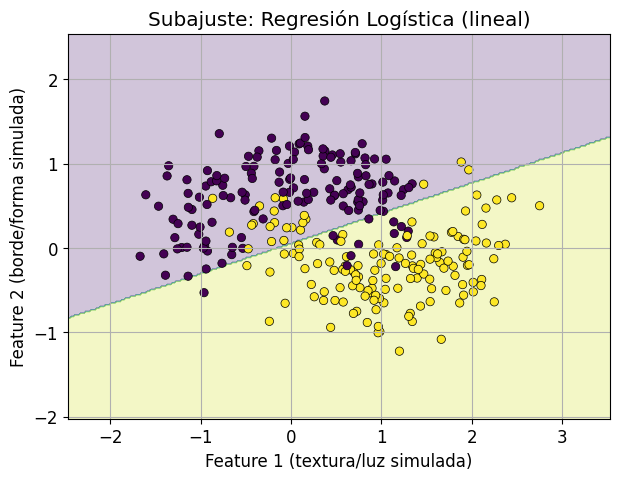

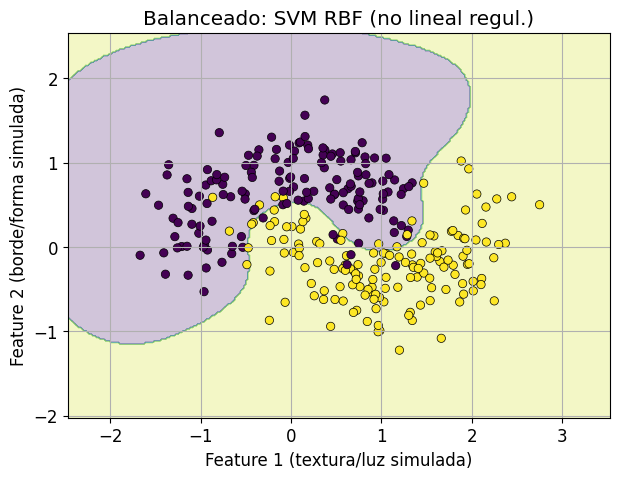

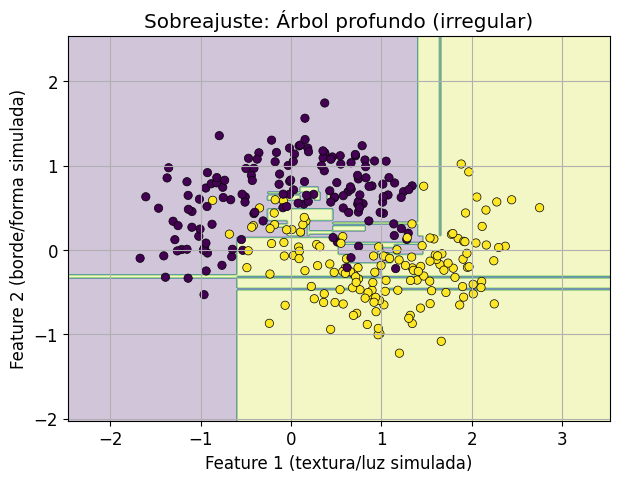

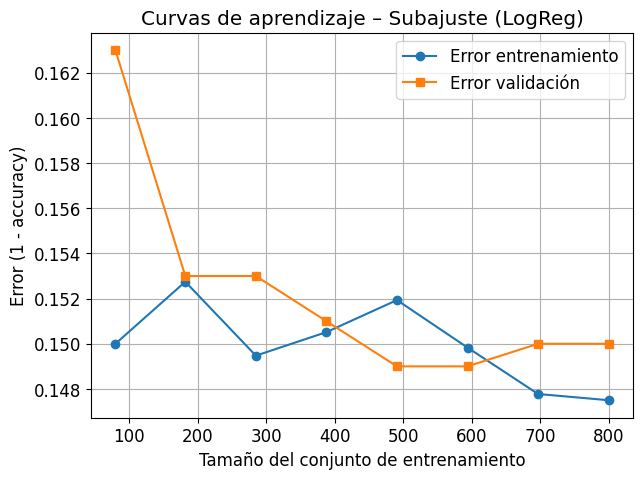

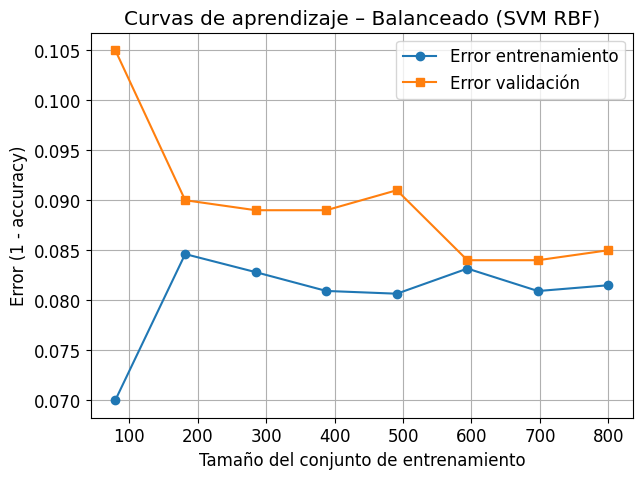

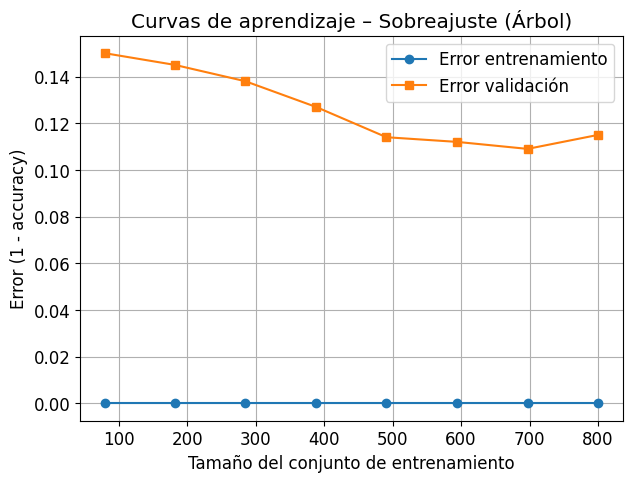

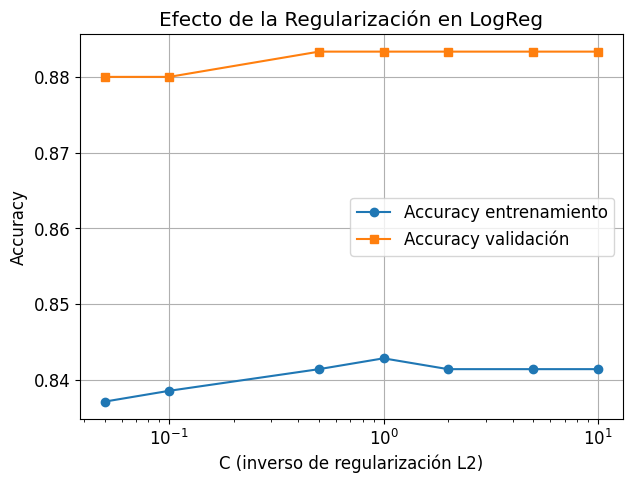


Matriz de confusión – Subajuste (LogReg)
              precision    recall  f1-score   support

           0      0.862     0.913     0.887       150
           1      0.908     0.853     0.880       150

    accuracy                          0.883       300
   macro avg      0.885     0.883     0.883       300
weighted avg      0.885     0.883     0.883       300



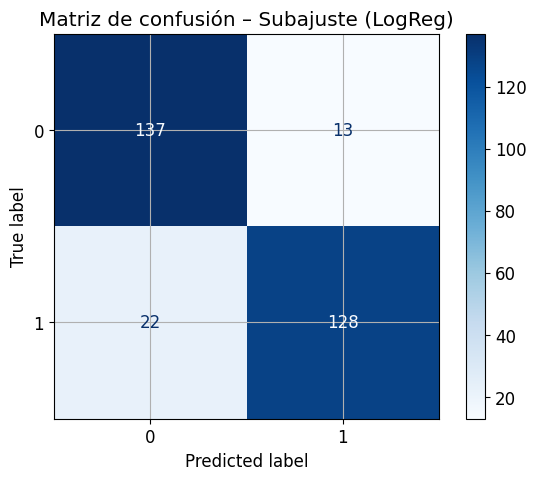


Matriz de confusión – Balanceado (SVM RBF)
              precision    recall  f1-score   support

           0      0.910     0.947     0.928       150
           1      0.944     0.907     0.925       150

    accuracy                          0.927       300
   macro avg      0.927     0.927     0.927       300
weighted avg      0.927     0.927     0.927       300



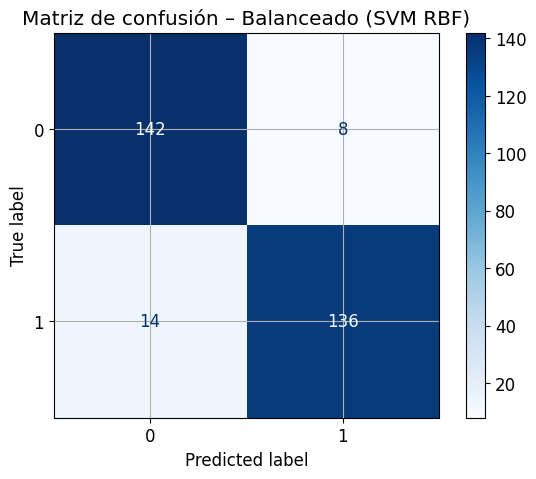


Matriz de confusión – Sobreajuste (Árbol)
              precision    recall  f1-score   support

           0      0.875     0.933     0.903       150
           1      0.929     0.867     0.897       150

    accuracy                          0.900       300
   macro avg      0.902     0.900     0.900       300
weighted avg      0.902     0.900     0.900       300



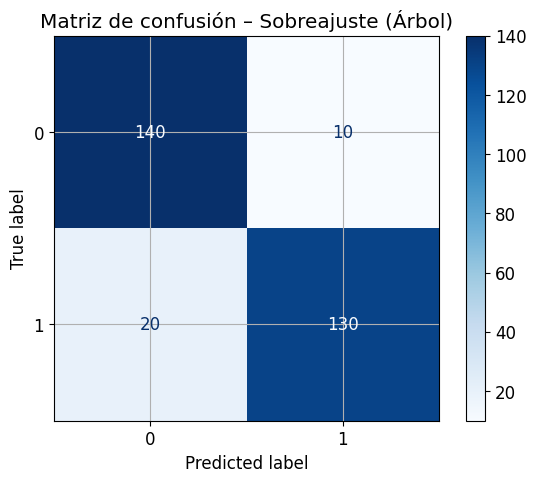


✅ Listo: ya tienes demostración visual + curvas de aprendizaje + regularización.


In [1]:
# -*- coding: utf-8 -*-
"""
El Dilema del Ajuste: Sobreajuste y Subajuste 🎯
Demostración visual con clasificación (dataset tipo "visión artificial" simulado).
"""

# =========================
# 1) IMPORTS Y UTILIDADES
# =========================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)
plt.rcParams.update({"figure.figsize": (7, 5), "axes.grid": True, "font.size": 12})

def plot_decision_boundary_2d(model, X, y, title="Frontera de decisión", step=0.02):
    # Solo para 2D (usamos las dos primeras características)
    x_min, x_max = X[:, 0].min() - 0.8, X[:, 0].max() + 0.8
    y_min, y_max = X[:, 1].min() - 0.8, X[:, 1].max() + 0.8
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidths=0.5)
    plt.title(title)
    plt.xlabel("Feature 1 (textura/luz simulada)")
    plt.ylabel("Feature 2 (borde/forma simulada)")
    plt.show()

def plot_learning_curves(estimator, X, y, title="Curvas de aprendizaje", cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=None, shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, 1-train_mean, marker='o', label='Error entrenamiento')
    plt.plot(train_sizes, 1-val_mean, marker='s', label='Error validación')
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Error (1 - accuracy)")
    plt.legend()
    plt.show()

# =========================
# 2) DATOS: "VISIÓN" SIMULADA
# =========================
# make_moons: separación no lineal, análogo a texturas/contornos que no separa bien una recta.
X, y = make_moons(n_samples=1000, noise=0.30, random_state=42)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Tamaños → Train:", X_train.shape, "| Test:", X_test.shape)

# =========================
# 3) MODELOS DE DIFERENTE COMPLEJIDAD
# =========================
# 3.1) Subajuste (modelo muy simple): Regresión Logística (frontera lineal)
clf_under = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=1.0, max_iter=500, random_state=42))
])

# 3.2) Balanceado: SVM con kernel RBF (capta no linealidades con regularización)
clf_good = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=2.0, gamma=0.8, random_state=42))
])

# 3.3) Sobreajuste (muy complejo): Árbol profundo sin límite de profundidad
clf_over = DecisionTreeClassifier(max_depth=None, random_state=42)

# Entrenamos
for name, model in [("Underfit / LogReg", clf_under), ("Balanced / SVM RBF", clf_good), ("Overfit / Árbol profundo", clf_over)]:
    model.fit(X_train, y_train)
    y_tr = model.predict(X_train)
    y_te = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(f"Accuracy entrenamiento: {accuracy_score(y_train, y_tr):.3f}")
    print(f"Accuracy validación   : {accuracy_score(y_test, y_te):.3f}")

# =========================
# 4) FRONTERAS DE DECISIÓN
# =========================
plot_decision_boundary_2d(clf_under, X_test, y_test, title="Subajuste: Regresión Logística (lineal)")
plot_decision_boundary_2d(clf_good,  X_test, y_test, title="Balanceado: SVM RBF (no lineal regul.)")
plot_decision_boundary_2d(clf_over,  X_test, y_test, title="Sobreajuste: Árbol profundo (irregular)")

# =========================
# 5) CURVAS DE APRENDIZAJE (DIAGNÓSTICO)
# =========================
plot_learning_curves(clf_under, X, y, title="Curvas de aprendizaje – Subajuste (LogReg)")
plot_learning_curves(clf_good,  X, y, title="Curvas de aprendizaje – Balanceado (SVM RBF)")
plot_learning_curves(clf_over,  X, y, title="Curvas de aprendizaje – Sobreajuste (Árbol)")

# =========================
# 6) REGULARIZACIÓN: EFECTO DEL PARÁMETRO EN LOGREG
# =========================
# C es el inverso de la regularización L2 (Ridge): C ↑ -> menos regularización -> más riesgo de sobreajuste.
Cs = [0.05, 0.1, 0.5, 1, 2, 5, 10]
acc_tr_list, acc_te_list = [], []

for C in Cs:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=500, random_state=42))
    ])
    model.fit(X_train, y_train)
    acc_tr_list.append(model.score(X_train, y_train))
    acc_te_list.append(model.score(X_test,  y_test))

plt.figure()
plt.plot(Cs, acc_tr_list, marker='o', label="Accuracy entrenamiento")
plt.plot(Cs, acc_te_list, marker='s', label="Accuracy validación")
plt.xscale('log')
plt.xlabel("C (inverso de regularización L2)")
plt.ylabel("Accuracy")
plt.title("Efecto de la Regularización en LogReg")
plt.legend()
plt.show()

# =========================
# 7) MATRICES DE CONFUSIÓN (UNA VISTA OPERATIVA)
# =========================
def plot_conf(model, Xtr, ytr, Xte, yte, title):
    from sklearn.metrics import ConfusionMatrixDisplay
    y_pred = model.predict(Xte)
    print("\n" + title)
    print(classification_report(yte, y_pred, digits=3))
    cm = confusion_matrix(yte, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

plot_conf(clf_under, X_train, y_train, X_test, y_test, "Matriz de confusión – Subajuste (LogReg)")
plot_conf(clf_good,  X_train, y_train, X_test, y_test, "Matriz de confusión – Balanceado (SVM RBF)")
plot_conf(clf_over,  X_train, y_train, X_test, y_test, "Matriz de confusión – Sobreajuste (Árbol)")

print("\n✅ Listo: ya tienes demostración visual + curvas de aprendizaje + regularización.")


## **El Dilema del Modelo y la Regularización Ridge y Lasso 🛠️**

  - **Motivación / Pregunta Problema:**
    Imagine que se ha construido un modelo de regresión para predecir el consumo energético de una planta. Al entrenarlo con los datos históricos de un año, el modelo alcanza una exactitud del 99.9% sobre esos mismos datos. Sin embargo, al utilizarlo para predecir el consumo de la semana siguiente, su rendimiento es deficiente. **¿Cuál es la causa?** El modelo no ha aprendido las relaciones subyacentes del proceso; en su lugar, ha capturado el **ruido y las correlaciones espurias** de los datos de entrenamiento. Se ha vuelto un experto en describir el pasado, pero es incapaz de generalizar al futuro. Este fenómeno se conoce como **sobreajuste (*overfitting*)**.

  - **Contexto:**
    El sobreajuste ocurre cuando un modelo es excesivamente complejo para el conjunto de datos disponible. En la regresión lineal, esto a menudo se manifiesta en coeficientes (`β`) de gran magnitud, que fuerzan al modelo a ajustarse a variaciones menores en los datos. Para mitigar esto, es necesario restringir la complejidad del modelo. La **Regularización** es una familia de técnicas diseñadas precisamente para este fin, añadiendo una penalización a la función de costo del modelo.

-----

## **¿Cómo funciona la Regularización? La Técnica de Penalización**

  - El principio fundamental consiste en modificar el objetivo del entrenamiento. En lugar de buscar únicamente la minimización del error, se introduce una doble condición:

    1. Minimizar el error de predicción (Suma de Errores Cuadráticos).
    2. Mantener la magnitud de los coeficientes del modelo (`β`) bajo control.

  - Esta penalización sobre los coeficientes previene que el modelo asigne una importancia desmedida a predictores individuales. Las dos estrategias de regularización más importantes son Ridge y Lasso.

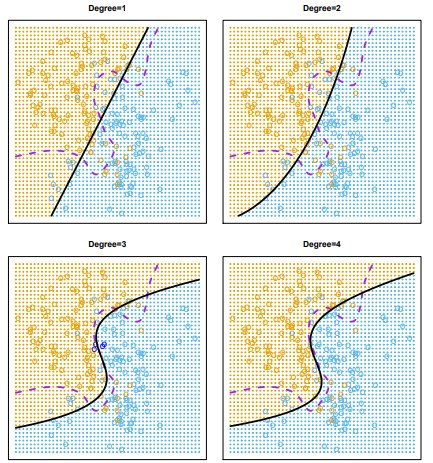

#### **Regularización Ridge (L2)**

  - La regresión Ridge añade una penalización equivalente a la suma de los **cuadrados** de los coeficientes. Este término (conocido como norma L2) reduce la magnitud de todos los coeficientes, acercándolos a cero sin que necesariamente lleguen a serlo. Es particularmente efectiva para crear modelos estables en presencia de multicolinealidad.

#### **Función de Costo Ridge:**
$$\text{Costo} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}\beta_j^2$$

  - Donde el primer término es la suma de errores al cuadrado y el segundo es la **penalización L2**. El hiperparámetro `λ` (lambda) controla la intensidad de dicha penalización.

#### **Regularización Lasso (L1)**

  - La regresión Lasso impone una penalización equivalente a la suma de los **valores absolutos** de los coeficientes (norma L1). Una propiedad fundamental de esta penalización es su capacidad para reducir algunos coeficientes a **exactamente cero**. Por lo tanto, Lasso no solo regulariza el modelo, sino que también realiza una **selección de variables** implícita.



**Función de Costo Lasso:**
$$\text{Costo} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p}|\beta_j|$$

  El segundo término es la **penalización L1**. Lasso es útil para identificar y descartar las variables menos relevantes del modelo.|


<div align="center">
  <img src="https://scientistcafe.com/ids/images/LassoRidge.png" width="80%">
</div>

  - **Interpretación visual:** Las elipses rojas son las curvas de nivel de la función de error, con el centro (`β̂`) representando la solución de mínimos cuadrados sin penalización. El área azul es la región de restricción impuesta por la regularización. La solución final se encuentra en el punto donde las elipses tocan por primera vez esta región.
      - La **restricción de Lasso (izquierda)**, con forma de rombo, tiene vértices sobre los ejes. Esto aumenta la probabilidad de que el punto de tangencia ocurra en un vértice, forzando a uno de los coeficientes a ser cero.
      - La **restricción de Ridge (derecha)**, de forma circular, no tiene vértices, por lo que el punto de contacto generalmente ocurre donde ambos coeficientes son distintos de cero.

-----

## **¿Por qué te importa en Ingeniería Industrial?**

  - **Ridge:** Se utiliza cuando se presume que la mayoría de las variables predictoras son relevantes y se busca estabilizar el modelo, especialmente si las variables están correlacionadas entre sí. Por ejemplo, al modelar la eficiencia de una línea con predictores como `velocidad_maquina`, `temperatura` y `humedad`.

  - **Lasso:** Es la elección preferida cuando se sospecha que muchas variables son redundantes o irrelevantes. Ayuda a simplificar el modelo y a mejorar su interpretabilidad. Por ejemplo, al predecir la calidad de un producto a partir de 50 lecturas de sensores, Lasso puede identificar los 5 predictores más influyentes y descartar el resto.

-----

## **Preguntas cortas:**

<mark style="background-color: #FFF59D">**1.** En un problema para predecir fallas en una máquina, tienes 100 variables provenientes de sensores, pero sospechas que solo unas pocas son realmente importantes. ¿Usarías Ridge o Lasso? Justifica tu respuesta.<mark>

<mark style="background-color: #FFF59D">**2.** Si entrenas un modelo Lasso y aumentas gradualmente el valor del hiperparámetro de penalización (λ), ¿qué efecto esperarías observar en los coeficientes del modelo?<mark>

<mark style="background-color: #FFF59D">**3.** Al ejecutar el código de regularización 3D, ¿qué sucede con los coeficientes del modelo a medida que aumenta el valor de λ? ¿Qué interpretación le das a la forma diferente en que Ridge y Lasso aplican sus penalizaciones?</mark>

In [ ]:
# # Descomenta si hace falta instalar plotly en tu Colab:
# !pip install -q plotly

# ===============================
# Simulación 3D: Ridge (L2) & Lasso (L1) con slider de λ
# ===============================
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# -------- 1) Datos sintéticos --------
np.random.seed(42)
n = 200
X = np.random.randn(n, 2)
beta_true = np.array([1.2, -0.8])
y = X @ beta_true + 0.6 * np.random.randn(n)

XtX = X.T @ X
Xty = X.T @ y
beta_ols = np.linalg.solve(XtX, Xty)

# -------- 2) Malla (β1, β2) y SSE(β) --------
bmin, bmax = -3.0, 3.0
num = 140
b1 = np.linspace(bmin, bmax, num)
b2 = np.linspace(bmin, bmax, num)
B1, B2 = np.meshgrid(b1, b2)

B = np.vstack([B1.ravel(), B2.ravel()])      # (2, num*num)
Y_pred = X @ B                               # (n, num*num)
res = y.reshape(-1, 1) - Y_pred
SSE = np.mean(res**2, axis=0).reshape(B1.shape)   # MSE puro (sin penalización)

# Penalizaciones base (independientes de λ)
ridge_pen_base = (B1**2 + B2**2)                 # ‖β‖^2
lasso_pen_base = (np.abs(B1) + np.abs(B2))       # ‖β‖_1

def sse_at(beta_vec):
    r = y - X @ beta_vec
    return float(np.mean(r**2))

# -------- 3) Conjunto de λ para slider --------
lambda_grid = [0.0, 0.2, 0.5, 1.0, 2.0]

def compute_for_lambda(lmbd):
    """Devuelve superficies y mínimos para un λ dado."""
    J_ridge = SSE + lmbd * ridge_pen_base
    J_lasso = SSE + lmbd * lasso_pen_base

    ols_height_ridge = sse_at(beta_ols) + lmbd * (beta_ols @ beta_ols)
    ols_height_lasso = sse_at(beta_ols) + lmbd * (np.abs(beta_ols).sum())

    # Mínimo analítico de Ridge para J = MSE + λ‖β‖^2
    ridge_sol = np.linalg.solve(XtX / n + lmbd * np.eye(2), Xty / n)
    ridge_height = sse_at(ridge_sol) + lmbd * (ridge_sol @ ridge_sol)

    # Mínimo Lasso: búsqueda en rejilla sobre la superficie (suficiente para visualizar)
    idx_min = int(np.argmin(J_lasso.ravel()))
    lasso_sol = np.array([B1.ravel()[idx_min], B2.ravel()[idx_min]])
    lasso_height = float(J_lasso.ravel()[idx_min])

    return (J_ridge, J_lasso,
            ols_height_ridge, ols_height_lasso,
            ridge_sol, ridge_height,
            lasso_sol, lasso_height)

# -------- 4) Figura con subplots 3D --------
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "surface"}, {"type": "surface"}]],
    subplot_titles=("Ridge (L2): J(β)=MSE+λ‖β‖²", "Lasso (L1): J(β)=MSE+λ‖β‖₁"),
    horizontal_spacing=0.05
)

# Estado inicial (λ = primero del grid)
(Jr0, Jl0, ols_hr0, ols_hl0,
 ridge_sol0, ridge_h0, lasso_sol0, lasso_h0) = compute_for_lambda(lambda_grid[0])

# Superficies
fig.add_trace(go.Surface(x=B1, y=B2, z=Jr0, colorscale="Turbo", showscale=True,
                         name="Ridge", opacity=0.96), row=1, col=1)
fig.add_trace(go.Surface(x=B1, y=B2, z=Jl0, colorscale="Turbo", showscale=True,
                         name="Lasso", opacity=0.96), row=1, col=2)

# Marcadores: OLS + mínimos
fig.add_trace(go.Scatter3d(x=[beta_ols[0]], y=[beta_ols[1]], z=[ols_hr0],
                           mode="markers+text", marker=dict(size=6, color="black"),
                           text=["OLS"], textposition="top center", name="OLS (Ridge Z)"),
              row=1, col=1)
fig.add_trace(go.Scatter3d(x=[ridge_sol0[0]], y=[ridge_sol0[1]], z=[ridge_h0],
                           mode="markers+text", marker=dict(size=7, symbol="diamond", color="white"),
                           text=["Ridge*"], textposition="top center", name="Ridge*"),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=[beta_ols[0]], y=[beta_ols[1]], z=[ols_hl0],
                           mode="markers+text", marker=dict(size=6, color="black"),
                           text=["OLS"], textposition="top center", name="OLS (Lasso Z)"),
              row=1, col=2)
fig.add_trace(go.Scatter3d(x=[lasso_sol0[0]], y=[lasso_sol0[1]], z=[lasso_h0],
                           mode="markers+text", marker=dict(size=7, symbol="x", color="white"),
                           text=["Lasso*"], textposition="top center", name="Lasso*"),
              row=1, col=2)

# ======== NUEVO: círculos/rombos en rojo ========
# Radio/semiejes de las regiones de restricción (ajusta si quieres)
r_L2 = 1.8   # círculo L2
r_L1 = 2.2   # rombo L1

# Círculo L2 (subplot Ridge, col=1) en el plano z = min(J_ridge)
theta = np.linspace(0, 2*np.pi, 361)
xc = r_L2 * np.cos(theta)
yc = r_L2 * np.sin(theta)
zc = np.full_like(theta, Jr0.min())
fig.add_trace(
    go.Scatter3d(x=xc, y=yc, z=zc, mode="lines",
                 line=dict(color="red", width=6),
                 name="Restricción L2 (círculo)"),
    row=1, col=1
)

# Rombo L1 (subplot Lasso, col=2) en el plano z = min(J_lasso)
xd = np.array([0,  r_L1, 0, -r_L1, 0])
yd = np.array([r_L1, 0, -r_L1, 0,  r_L1])
zd = np.full_like(xd, Jl0.min())
fig.add_trace(
    go.Scatter3d(x=xd, y=yd, z=zd, mode="lines",
                 line=dict(color="red", width=6),
                 name="Restricción L1 (rombo)"),
    row=1, col=2
)
# ================================================

# Apariencia y cámara
for c in (1, 2):
    fig.update_scenes(
        xaxis_title="β1", yaxis_title="β2", zaxis_title="J(β)",
        camera=dict(eye=dict(x=1.8, y=1.4, z=1.2)),
        bgcolor="rgba(245,245,245,0.85)",
        row=1, col=c
    )

fig.update_layout(
    title="Regularización: superficies 3D interactivas (Ridge vs Lasso) — usa el slider de λ",
    template="plotly_white",
    height=650
)

# -------- 5) Frames y slider de λ --------
frames = []
for lmbd in lambda_grid:
    (Jr, Jl, ols_hr, ols_hl,
     ridge_sol, ridge_h, lasso_sol, lasso_h) = compute_for_lambda(lmbd)

    frames.append(go.Frame(
        name=f"λ={lmbd}",
        data=[
            go.Surface(z=Jr),  # trace 0 (Ridge)
            go.Surface(z=Jl),  # trace 1 (Lasso)
            go.Scatter3d(x=[beta_ols[0]], y=[beta_ols[1]], z=[ols_hr]),  # trace 2
            go.Scatter3d(x=[ridge_sol[0]], y=[ridge_sol[1]], z=[ridge_h]),  # trace 3
            go.Scatter3d(x=[beta_ols[0]], y=[beta_ols[1]], z=[ols_hl]),  # trace 4
            go.Scatter3d(x=[lasso_sol[0]], y=[lasso_sol[1]], z=[lasso_h])   # trace 5
        ],
        traces=[0, 1, 2, 3, 4, 5]   # <- las figuras rojas (círculo/rombo) quedan fijas
    ))

fig.frames = frames

steps = []
for lmbd in lambda_grid:
    steps.append(dict(
        method="animate",
        args=[[f"λ={lmbd}"],
              dict(mode="immediate", frame=dict(duration=0, redraw=True),
                   transition=dict(duration=0))],
        label=str(lmbd)
    ))

fig.update_layout(
    updatemenus=[dict(
        type="buttons", showactive=False, x=0.07, y=1.12,
        buttons=[
            dict(label="Play", method="animate",
                 args=[None, dict(frame=dict(duration=600, redraw=True),
                                  fromcurrent=True, transition=dict(duration=200))]),
            dict(label="Pause", method="animate",
                 args=[[None], dict(frame=dict(duration=0, redraw=False),
                                    transition=dict(duration=0))])
        ]
    )],
    sliders=[dict(active=0, currentvalue={"prefix": "λ = "},
                  steps=steps, x=0.2, y=0.05, len=0.6)]
)

fig.show()

# -------- 6) Tabla para interpretación --------
summary_rows = []
for lmbd in lambda_grid:
    (_, _, _, _,
     ridge_sol, ridge_h, lasso_sol, lasso_h) = compute_for_lambda(lmbd)
    summary_rows.append({
        "lambda": lmbd,
        "beta1_OLS": beta_ols[0], "beta2_OLS": beta_ols[1],
        "beta1_Ridge*": ridge_sol[0], "beta2_Ridge*": ridge_sol[1],
        "J_Ridge(β*)": ridge_h,
        "beta1_Lasso*": lasso_sol[0], "beta2_Lasso*": lasso_sol[1],
        "J_Lasso(β*)": lasso_h
    })

summary = pd.DataFrame(summary_rows)
from IPython.display import display
display(summary.style.format(precision=4))

# (Opcional) Guardar interactivo
pio.write_html(fig, file="regularizacion_3d.html", include_plotlyjs="cdn", full_html=True)
#print("Se guardó: regularizacion_3d.html")
# from google.colab import files; files.download("regularizacion_3d.html")  # <- Descomenta para descargar


-----

## **GridSearchCV: Encontrando la Mejor Configuración para tu Modelo 🔎**

  - **Motivación / Pregunta Problema:**
    Hemos visto que el hiperparámetro `λ` (o `alpha` en Scikit-Learn) controla la intensidad de la regularización en Ridge y Lasso. Pero esto nos deja con una pregunta crucial: **¿qué valor de `alpha` debemos elegir?** Un valor muy pequeño podría no solucionar el sobreajuste, mientras que uno muy grande podría simplificar demasiado el modelo (causando subajuste). Probar valores al azar es ineficiente y poco fiable. ¿Cómo podemos encontrar de forma sistemática el valor óptimo de `alpha` para nuestro problema específico?


    

  - **Contexto:**
    La solución es el **ajuste de hiperparámetros**, y `GridSearchCV` es una de las técnicas más robustas y populares para lograrlo. Un **hiperparámetro** es una configuración del modelo que no se aprende a partir de los datos, sino que la establecemos nosotros antes del entrenamiento (como `alpha`). `GridSearchCV` automatiza la búsqueda del mejor hiperparámetro probando una "rejilla" (grid) de valores que le proporcionamos y evaluando el rendimiento de cada uno mediante un proceso llamado **validación cruzada (Cross-Validation)**.

-----

## **¿Cómo funciona GridSearchCV?**

El proceso se puede resumir en tres pasos clave:

1.  **Definir la Rejilla de Búsqueda:** Primero, especificamos los hiperparámetros y los valores que queremos probar. Para un modelo Lasso, la rejilla podría ser una lista de diferentes valores de `alpha`.

    ```python
    # Ejemplo de una rejilla de parámetros para Lasso
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
    ```

2.  **Búsqueda y Validación Cruzada:** Para **cada valor** en la rejilla, `GridSearchCV` realiza una validación cruzada (k-fold Cross-Validation). Divide los datos de entrenamiento en 'k' partes o "folds" (por ejemplo, 5). Luego, entrena el modelo 'k' veces, usando en cada ocasión un fold diferente para validar y el resto para entrenar.

3.  **Selección del Mejor Modelo:** Tras probar todos los valores, calcula la métrica de rendimiento promedio (ej. error cuadrático medio) para cada uno. El valor del hiperparámetro que haya obtenido el mejor rendimiento promedio es seleccionado como el óptimo. Finalmente, `GridSearchCV` reentrena un nuevo modelo sobre **todos** los datos de entrenamiento utilizando este hiperparámetro ganador, dejándolo listo para su uso.

<div align="center">
  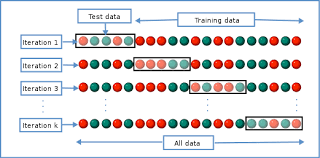
</div>

-----

## **¿Por qué te importa en Ingeniería Industrial?**

  - **Robustez y Fiabilidad:** `GridSearchCV` elimina las conjeturas y el proceso manual de prueba y error. Permite construir modelos cuyo rendimiento no depende de una elección afortunada del hiperparámetro, sino de un proceso de optimización sistemático, lo que los hace mucho más fiables para aplicaciones críticas como la predicción de demanda o el mantenimiento predictivo.
  - **Optimización del Rendimiento:** Asegura que estás extrayendo el máximo potencial de tu modelo. En lugar de conformarte con un modelo "suficientemente bueno", encuentras la configuración que ofrece el mejor balance entre sesgo y varianza, llevando a predicciones más precisas en la práctica.

-----

## **Preguntas cortas:**

<mark style="background-color: #FFF59D">**1.** Quieres optimizar un modelo Ridge y pruebas manualmente `alpha=10`, obteniendo un buen resultado. ¿Por qué sigue siendo metodológicamente superior usar `GridSearchCV` en lugar de quedarte con ese valor?<mark>

<mark style="background-color: #FFF59D">**2.** Además del modelo en sí (ej. `Lasso()`), ¿cuáles son los dos componentes principales que debes proporcionar a `GridSearchCV` para iniciar la búsqueda de hiperparámetros?<mark>

<mark style="background-color: #FFF59D">**3.** Si `GridSearchCV` selecciona un `alpha` muy pequeño (cercano a cero) como el mejor parámetro para tu modelo, ¿qué te sugiere esto sobre el nivel de sobreajuste que tenía tu modelo original sin regularizar?<mark>


In [ ]:
# ===============================================
# GridSearchCV en REGRESIÓN: OLS vs Ridge vs Lasso vs ElasticNet
# Versión Colab-compatible (sin usar `squared=` en mean_squared_error)
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

# -------- util: RMSE compatible con todas las versiones --------
def rmse(y_true, y_pred):
    # Evita usar el parámetro 'squared' (no existe en versiones viejas)
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

# -----------------------------
# 1) Datos y split
# -----------------------------
np.random.seed(42)
X, y = make_regression(
    n_samples=1500, n_features=20, n_informative=10,
    noise=15.0, effective_rank=10, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 2) Pipeline genérico
# -----------------------------
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("poly",   PolynomialFeatures(include_bias=False)),
    ("reg",    LinearRegression())  # placeholder; se sobrescribe desde el grid
])

# -----------------------------
# 3) Espacios de hiperparámetros
# -----------------------------
alphas  = np.logspace(-4, 2, 7)      # 1e-4 ... 1e2
l1r     = [0.1, 0.3, 0.5, 0.7, 0.9]  # mezcla L1/L2 para ElasticNet
degrees = [1, 2]                     # complejidad del modelo

param_grid = [
    # --- OLS (LinearRegression) ---
    {
        "poly__degree": degrees,
        "reg": [LinearRegression()],
        "reg__fit_intercept": [True, False],
        # "reg__positive": [False, True],  # opcional si quieres β >= 0
    },
    # --- Ridge ---
    {
        "poly__degree": degrees,
        "reg": [Ridge()],
        "reg__alpha": alphas,
        "reg__fit_intercept": [True, False],
    },
    # --- Lasso ---
    {
        "poly__degree": degrees,
        "reg": [Lasso(max_iter=10000)],
        "reg__alpha": alphas,
        "reg__fit_intercept": [True, False],
    },
    # --- ElasticNet ---
    {
        "poly__degree": degrees,
        "reg": [ElasticNet(max_iter=10000)],
        "reg__alpha": alphas,
        "reg__l1_ratio": l1r,
        "reg__fit_intercept": [True, False],
    }
]

# -----------------------------
# 4) GridSearchCV
# -----------------------------
# Si tu sklearn es antiguo y no soporta 'neg_root_mean_squared_error',
# usa 'neg_mean_squared_error' y luego conviertes a RMSE con sqrt.
try:
    scoring = "neg_root_mean_squared_error"
    _ = 0.0  # dummy
except Exception:
    scoring = "neg_mean_squared_error"

cv = KFold(n_splits=10, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    n_jobs=-1,
    cv=cv,
    refit=True,
    return_train_score=True,
    verbose=0
)
gs.fit(X_train, y_train)

# Mejor score CV (convertimos a RMSE positivo)
best_cv_score = -gs.best_score_
if scoring == "neg_mean_squared_error":
    best_cv_score = float(np.sqrt(best_cv_score))  # a RMSE

print("==> Mejor RMSE (CV):", round(best_cv_score, 4))
print("==> Mejor conjunto de hiperparámetros:\n", gs.best_params_)
print("\n==> Mejor estimador:\n", gs.best_estimator_)

# -----------------------------
# 5) Evaluación en TEST
# -----------------------------
y_pred = gs.predict(X_test)
rmse_test = rmse(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("\n==> Métricas en TEST")
print("RMSE (test):", round(rmse_test, 4))
print("R²   (test):", round(r2_test, 4))

# -----------------------------
# 6) Análisis del espacio de búsqueda (heatmaps)
# -----------------------------
res = pd.DataFrame(gs.cv_results_)

def is_model(df, name_prefix):
    return df["param_reg"].astype(str).str.startswith(name_prefix)

def to_rmse(values):
    v = -values.astype(float)
    if scoring == "neg_mean_squared_error":
        return np.sqrt(v)  # pasar de MSE a RMSE
    return v  # ya es RMSE

# --- Heatmap RIDGE: alpha vs degree ---
ridge = res[is_model(res, "Ridge")]
if not ridge.empty:
    pivot_ridge = ridge.pivot_table(
        index="param_reg__alpha",
        columns="param_poly__degree",
        values="mean_test_score"
    )
    fig, ax = plt.subplots(figsize=(5.8, 4.2))
    im = ax.imshow(to_rmse(pivot_ridge), aspect="auto")
    ax.set_yticks(range(len(pivot_ridge.index)))
    ax.set_yticklabels([f"{a:g}" for a in pivot_ridge.index])
    ax.set_xticks(range(len(pivot_ridge.columns)))
    ax.set_xticklabels(pivot_ridge.columns.astype(int))
    ax.set_ylabel("alpha"); ax.set_xlabel("degree")
    ax.set_title("Ridge — RMSE CV")
    cbar = plt.colorbar(im, ax=ax); cbar.set_label("RMSE")
    plt.tight_layout(); plt.show()

# --- Heatmap LASSO: alpha vs degree ---
lasso = res[is_model(res, "Lasso")]
if not lasso.empty:
    pivot_lasso = lasso.pivot_table(
        index="param_reg__alpha",
        columns="param_poly__degree",
        values="mean_test_score"
    )
    fig, ax = plt.subplots(figsize=(5.8, 4.2))
    im = ax.imshow(to_rmse(pivot_lasso), aspect="auto")
    ax.set_yticks(range(len(pivot_lasso.index)))
    ax.set_yticklabels([f"{a:g}" for a in pivot_lasso.index])
    ax.set_xticks(range(len(pivot_lasso.columns)))
    ax.set_xticklabels(pivot_lasso.columns.astype(int))
    ax.set_ylabel("alpha"); ax.set_xlabel("degree")
    ax.set_title("Lasso — RMSE CV")
    cbar = plt.colorbar(im, ax=ax); cbar.set_label("RMSE")
    plt.tight_layout(); plt.show()

# --- Heatmap ELASTICNET: alpha vs l1_ratio (mejor degree) ---
enet = res[is_model(res, "ElasticNet")]
if not enet.empty:
    best_deg = (enet.groupby("param_poly__degree")["mean_test_score"]
                .mean().idxmax())
    enet_d = enet[enet["param_poly__degree"] == best_deg]
    pivot_enet = enet_d.pivot_table(
        index="param_reg__alpha",
        columns="param_reg__l1_ratio",
        values="mean_test_score"
    )
    fig, ax = plt.subplots(figsize=(6.2, 4.2))
    im = ax.imshow(to_rmse(pivot_enet), aspect="auto")
    ax.set_yticks(range(len(pivot_enet.index)))
    ax.set_yticklabels([f"{a:g}" for a in pivot_enet.index])
    ax.set_xticks(range(len(pivot_enet.columns)))
    ax.set_xticklabels([f"{c:.1f}" for c in pivot_enet.columns])
    ax.set_ylabel("alpha"); ax.set_xlabel(f"l1_ratio  (degree = {best_deg})")
    ax.set_title("ElasticNet — RMSE CV")
    cbar = plt.colorbar(im, ax=ax); cbar.set_label("RMSE")
    plt.tight_layout(); plt.show()

# -----------------------------
# 7) Top-10 configuraciones globales por CV
# -----------------------------
cols = [
    "rank_test_score", "mean_test_score", "std_test_score",
    "param_poly__degree", "param_reg", "param_reg__fit_intercept",
    "param_reg__alpha", "param_reg__l1_ratio"
]
top10 = (res.sort_values("rank_test_score")[cols]
         .head(10).rename(columns={"mean_test_score":"neg_score_CV"}))
# convertir columna de score a RMSE positivo para leer mejor
top10["RMSE_CV"] = to_rmse(top10["neg_score_CV"].astype(float))
display(top10.drop(columns=["neg_score_CV"]))


In [ ]:
# ===============================================
# GridSearchCV "todo en uno": SVC vs RandomForest
# - Datos: Breast Cancer (binario)
# - Pipeline con preprocesamiento
# - Grid único con dos modelos y sus espacios
# - CV estratificado, scoring=roc_auc, n_jobs=-1
# - Reporte, heatmaps de hiperparámetros y métricas en test
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, RocCurveDisplay,
                             roc_auc_score)

# -----------------------------
# 1) Datos y split estratificado (CON RUIDO)
# -----------------------------
data = load_breast_cancer()
X, y = data.data, data.target

# ¡AÑADIMOS RUIDO!
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.75, size=X.shape) # Ajusta 'scale' para más/menos ruido
X_noisy = X + noise

X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.25, stratify=y, random_state=42
)

# ... el resto de tu código sigue igual ...
gs.fit(X_train, y_train) # Vuelve a ejecutar el fit con los datos ruidosos

# --------------------------------------------
# 2) Pipeline genérico: preprocesamiento + clf
#    - Para modelos lineales/por distancia: StandardScaler()
#    - Para árboles: 'passthrough' (escala irrelevante)
# --------------------------------------------
pipe = Pipeline(steps=[
    ("pre", StandardScaler()),
    ("clf", SVC(probability=True, random_state=0))  # placeholder; se sobrescribe desde el grid
])

# --------------------------------------------
# 3) Espacios de hiperparámetros (dos modelos)
#    NOTA: un único param_grid con DOS diccionarios:
#    - uno activa SVC + sus hiperparámetros
#    - otro activa RandomForest + sus hiperparámetros
# --------------------------------------------
C_vals     = [1e-3, 1e-2, 1e-1, 1, 10, 100]
gamma_vals = [1e-3, 1e-2, 1e-1, 1, 10]

param_grid = [
    # --- Modelo 1: SVC ---
    {
        "pre": [StandardScaler()],                 # escala activa
        "clf": [SVC(probability=True, random_state=0)],
        "clf__kernel": ["linear"],
        "clf__C": C_vals
    },
    {
        "pre": [StandardScaler()],
        "clf": [SVC(probability=True, random_state=0)],
        "clf__kernel": ["rbf"],
        "clf__C": C_vals,
        "clf__gamma": gamma_vals
    },

    # --- Modelo 2: RandomForest ---
    {
        "pre": ["passthrough"],                    # sin escalar
        "clf": [RandomForestClassifier(random_state=0)],
        "clf__n_estimators": [100, 300, 600],
        "clf__max_depth": [None, 5, 10],
        "clf__min_samples_split": [2, 5],
        "clf__max_features": ["sqrt", "log2"]
    }
]

# --------------------------------------------
# 4) GridSearchCV: CV estratificado 10 folds
# --------------------------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",        # métrica robusta para binario
    n_jobs=-1,                # paralelo
    cv=cv,
    refit=True,               # reentrena el MEJOR según scoring
    return_train_score=True,
    verbose=0
)

gs.fit(X_train, y_train)

print("==> Mejor score CV (mean ROC AUC):", round(gs.best_score_, 5))
print("==> Mejor conjunto de hiperparámetros:")
pprint(gs.best_params_)
print("\n==> Mejor estimador:\n", gs.best_estimator_)

# --------------------------------------------
# 5) Evaluación en TEST del mejor modelo
# --------------------------------------------
y_prob = gs.predict_proba(X_test)[:, 1]
y_pred = gs.predict(X_test)

print("\n==> Métricas en TEST")
print("ROC AUC (test):", round(roc_auc_score(y_test, y_prob), 5))
print("\nClassification report (test):\n", classification_report(y_test, y_pred, target_names=data.target_names))
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_pred))

# Curva ROC del mejor
disp = RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC curve — Best model on TEST")
plt.show()

# --------------------------------------------
# 6) Análisis del espacio de búsqueda (heatmaps)
#    - Heatmap SVC RBF: C vs gamma (ROC AUC medio CV)
#    - Heatmap RandomForest: n_estimators vs max_depth
# --------------------------------------------
res = pd.DataFrame(gs.cv_results_)

# helper para identificar modelo por clase
def model_name(row):
    est = row.get("param_clf")
    if hasattr(est, "classes"):
        # a veces devuelve cadena con repr del estimador
        est = row["param_clf"]
    return str(row["param_clf"]).split("(")[0]

res["modelo"] = res.apply(model_name, axis=1)

# --- Heatmap SVC RBF ---
svc_rbf = res[(res["param_clf"].astype(str).str.startswith("SVC")) &
              (res["param_clf__kernel"] == "rbf")]

if not svc_rbf.empty:
    # Pivot: filas = C, columnas = gamma
    pivot_svc = svc_rbf.pivot_table(
        index="param_clf__C",
        columns="param_clf__gamma",
        values="mean_test_score"
    )
    fig, ax = plt.subplots(figsize=(6, 4.5))
    im = ax.imshow(pivot_svc.values, aspect="auto")
    ax.set_xticks(range(len(pivot_svc.columns)))
    ax.set_xticklabels(pivot_svc.columns.astype(str), rotation=45, ha="right")
    ax.set_yticks(range(len(pivot_svc.index)))
    ax.set_yticklabels(pivot_svc.index.astype(str))
    ax.set_xlabel("gamma")
    ax.set_ylabel("C")
    ax.set_title("SVC (RBF) — mean ROC AUC (CV)")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("mean_test_score")
    plt.tight_layout()
    plt.show()

# --- Heatmap RandomForest ---
rf = res[res["param_clf"].astype(str).str.startswith("RandomForestClassifier")]
if not rf.empty:
    pivot_rf = rf.pivot_table(
        index="param_clf__n_estimators",
        columns="param_clf__max_depth",
        values="mean_test_score",
        aggfunc="mean"
    )
    fig, ax = plt.subplots(figsize=(6, 4.5))
    im = ax.imshow(pivot_rf.values, aspect="auto")
    ax.set_xticks(range(len(pivot_rf.columns)))
    ax.set_xticklabels([str(c) for c in pivot_rf.columns], rotation=45, ha="right")
    ax.set_yticks(range(len(pivot_rf.index)))
    ax.set_yticklabels(pivot_rf.index.astype(str))
    ax.set_xlabel("max_depth")
    ax.set_ylabel("n_estimators")
    ax.set_title("RandomForest — mean ROC AUC (CV)")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("mean_test_score")
    plt.tight_layout()
    plt.show()

# --------------------------------------------
# 7) Top-10 combinaciones globales por CV score
# --------------------------------------------
cols_show = [
    "rank_test_score", "mean_test_score", "std_test_score",
    "param_pre", "param_clf",
    "param_clf__kernel", "param_clf__C", "param_clf__gamma",
    "param_clf__n_estimators", "param_clf__max_depth",
    "param_clf__min_samples_split", "param_clf__max_features"
]
top10 = res.sort_values("rank_test_score")[cols_show].head(10)
print("\n==> TOP-10 combinaciones (CV):")
display(top10)


# **Semana 8 - Clase 2**

-----


## **Construir un Árbol de Decisión: El Diagrama de Flujo Inteligente para la Optimización de Procesos 🏭**

  - **Motivación / Pregunta Problema:**
    Imagine que es un Ingeniero Industrial a cargo de una línea de producción. Últimamente, la tasa de defectos de un producto ha aumentado y su misión es encontrar la **causa raíz**. No empezaría midiendo cada variable al azar; seguiría un método lógico. Primero, se haría la pregunta de mayor impacto: "¿El problema ocurre en la Máquina A o en la Máquina B?". Al descubrir que el 90% de los defectos provienen de la Máquina A, enfocaría su atención ahí. Su siguiente pregunta podría ser: "¿Ocurre en el turno de mañana o en el de tarde?". Y así sucesivamente, descendiendo por las posibles causas hasta aislar el problema. **¿Cómo puede una máquina analizar miles de datos de producción y construir este "árbol de diagnóstico" automáticamente, descubriendo qué variables son las más críticas para predecir un defecto?**

  - **Contexto: La Anatomía de un Árbol de Proceso**
    Un árbol de decisión es un **modelo de "caja blanca"**; a diferencia de una red neuronal, podemos auditar su lógica y entender exactamente por qué llega a una conclusión. Sus componentes, aplicados a un problema industrial, son:

      * **Nodo Raíz (*Root Node*):** El punto de partida. Contiene todos los datos (ej. "Todos los registros de producción de la última semana").
      * **Nodos de Decisión (*Decision Nodes*):** Representan una inspección sobre una variable del proceso (ej. "¿La presión de la inyectora fue \> 200 PSI?").
      * **Ramas (*Branches*):** Las respuestas a esa inspección ("Sí" / "No"), que segmentan los datos.
      * **Nodos Hoja (*Leaf Nodes*):** Los nodos terminales que contienen la predicción final (ej. "Clase: Defectuoso con 85% de probabilidad").

    El objetivo del algoritmo es encontrar las preguntas que creen subgrupos lo más **"puros"** posible, es decir, que aíslen las condiciones que conducen a un resultado específico.


<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*YEwFetXQGPB8aDFV" width="60%">
</div>

-----

## **¿Cómo Aprende el Árbol? El Ingeniero de Calidad Automatizado**

El árbol se construye mediante un proceso de **particionamiento recursivo**, actuando como un ingeniero de calidad incansable que analiza los datos 24/7.

  - **El Proceso de División Inteligente:**

    1.  **Inicio:** El algoritmo parte del Nodo Raíz con una mezcla de productos Aptos y Defectuosos (un estado de alta "impureza").
    2.  **Búsqueda de la Variable Crítica:** Analiza todas las variables del proceso (temperatura, presión, velocidad, operario, etc.) y prueba cada posible punto de corte.
    3.  **Selección de la Mejor División:** Elige la variable y el umbral que logran la separación más "limpia" de los datos, generando la mayor **ganancia de información**. Esta se convierte en la primera pregunta del árbol.
    4.  **Repetición:** El algoritmo repite este proceso en cada nueva rama, buscando la siguiente mejor pregunta para los subconjuntos de datos resultantes.

  - **La Métrica Clave: Ganancia de Información (Information Gain) 📐**
    Para decidir cuál es la "mejor división", el algoritmo utiliza un concepto llamado **Entropía**, que mide el grado de impureza o desorden de un conjunto de datos.

**1. Entropía (H):** Mide el desorden en un nodo. Su valor va de 0 (nodo puro, todos los productos son iguales) a 1 (máximo desorden, 50% Aptos y 50% Defectuosos).

  $$H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$

  Donde $p_i$ es la proporción de productos que pertenecen a cada clase (ej. Apto, Defectuoso).

**2. Ganancia de Información (IG):** Mide la **reducción** en la entropía después de aplicar una división. El árbol calcula esto para cada posible división y elige la que maximiza esta ganancia.

  $$IG(S, A) = H(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} H(S_v)$$

En esencia, la fórmula dice:     *Ganancia de Información = Entropía del nodo padre - Promedio ponderado de la entropía de los nodos hijos.*

  - **La Poda: El Secreto Contra el Sobreajuste**
    Si dejamos que un árbol crezca sin límites, **sobreajustará**. Es el equivalente a un ingeniero que concluye: "El defecto ocurre cuando el Operador Juan trabaja un martes lluvioso usando la Máquina A con el lote 302". Esta regla es tan específica que memoriza el ruido del pasado, pero es inútil para predecir el futuro. Para evitarlo, se usan parámetros de "poda":

      * `max_depth`: Limita la profundidad del árbol (cuántas preguntas seguidas se pueden hacer).
      * `min_samples_leaf`: Exige que cada regla final (nodo hoja) se base en un número mínimo de casos.

    Estos controles aseguran que el modelo aprenda **patrones generales y robustos**, no coincidencias aleatorias.



<div align="center">
  <img src="https://ekamperi.github.io/images/decision_trees/pure_vs_impure_node.png" width="60%">
</div>

Entender cómo construir y controlar un árbol de decisión permite transformar datos crudos de producción en reglas claras y accionables para la mejora continua.

-----

## **Preguntas cortas:**

<mark style="background-color: #FFF59D">**1.** En un árbol de decisión para optimizar la logística de un almacén, ¿qué podría representar un **nodo hoja**?<mark>

<mark style="background-color: #FFF59D">**2.** Un ingeniero crea un árbol para predecir fallos en una máquina. El árbol es extremadamente profundo y tiene reglas muy específicas como "Si la `temperatura` es 75.3°C y la `vibración` es 0.152 m/s² y el `operador` es Juan...". ¿Qué problema de ajuste es este y por qué no sería fiable en la práctica diaria de la planta?<mark>

In [ ]:
# =============================================================================
# **Paso 1: Importar Bibliotecas y Generar Datos de Producción**
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Para que los resultados sean siempre los mismos
np.random.seed(42)

# Simulación de datos de una línea de producción
n_samples = 300
data = {
    'maquina': np.random.choice(['Maquina_A', 'Maquina_B'], n_samples, p=[0.6, 0.4]),
    'presion': np.random.normal(200, 25, n_samples),
    'temperatura': np.random.normal(80, 10, n_samples),
    'turno': np.random.choice(['Mañana', 'Tarde'], n_samples)
}
df = pd.DataFrame(data)

# Introducimos reglas "ocultas" para generar los defectos
# La Maquina_A con alta presión es la principal causa de defectos
df['estado'] = 'Apto'
df.loc[(df['maquina'] == 'Maquina_A') & (df['presion'] > 225), 'estado'] = 'Defectuoso'

# La Maquina_B con baja temperatura también genera algunos defectos
df.loc[(df['maquina'] == 'Maquina_B') & (df['temperatura'] < 75), 'estado'] = 'Defectuoso'

# Añadimos un poco de ruido para hacerlo más realista
random_indices = np.random.choice(df.index, size=15, replace=False)
df.loc[random_indices, 'estado'] = np.random.choice(['Apto', 'Defectuoso'], size=15)

print("Muestra de los datos de producción:")
print(df.head())
print("\nDistribución de productos:")
print(df['estado'].value_counts())

# =============================================================================
# **Paso 2: La Métrica Clave - Entropía y Ganancia de Información 📐**
# =============================================================================
# El árbol necesita una forma de medir qué tan "puro" o "desordenado" es un grupo de datos.
# Para eso utiliza la Entropía. Un grupo puro (todos Aptos o todos Defectuosos) tiene Entropía 0.
# Un grupo con 50/50 de cada clase tiene Entropía 1 (máximo desorden).

def calcular_entropia(series):
    """Calcula la entropía de una serie de pandas con clases."""
    # Frecuencia de cada clase
    counts = series.value_counts()
    # Proporción de cada clase
    proportions = counts / len(series)
    # Aplicamos la fórmula de la entropía
    entropia = -np.sum(proportions * np.log2(proportions + 1e-9)) # +1e-9 para evitar log(0)
    return entropia

# -----------------------------------------------------------------------------
# **2.1 Entropía del Nodo Raíz**
# -----------------------------------------------------------------------------
# Empezamos midiendo el desorden inicial de todos nuestros datos.
entropia_raiz = calcular_entropia(df['estado'])
print(f"\n--- ANÁLISIS DE LA DIVISIÓN INTELIGENTE ---")
print(f"La Entropía inicial (Nodo Raíz) de todos los datos es: {entropia_raiz:.4f}")
print("Este valor representa nuestro desorden inicial, que queremos reducir.")

# -----------------------------------------------------------------------------
# **2.2 Cálculo de la Ganancia de Información**
# -----------------------------------------------------------------------------
# El árbol prueba todas las divisiones posibles para ver cuál reduce más la entropía.
# Esta reducción se llama "Ganancia de Información".

def calcular_ganancia_informacion(df, variable_division, variable_objetivo):
    """Calcula la ganancia de información al dividir un dataframe por una variable."""
    # Entropía del nodo padre (antes de la división)
    entropia_padre = calcular_entropia(df[variable_objetivo])

    # Calculamos la entropía ponderada de los nodos hijos
    valores_unicos = df[variable_division].unique()
    entropia_hijos_ponderada = 0
    for valor in valores_unicos:
        subconjunto = df[df[variable_division] == valor]
        peso = len(subconjunto) / len(df)
        entropia_hijos_ponderada += peso * calcular_entropia(subconjunto[variable_objetivo])

    ganancia = entropia_padre - entropia_hijos_ponderada
    return ganancia

# El algoritmo prueba qué pregunta es mejor: "¿Es la Máquina A o B?" o "¿Es del turno de Mañana o Tarde?"
ganancia_maquina = calcular_ganancia_informacion(df, 'maquina', 'estado')
ganancia_turno = calcular_ganancia_informacion(df, 'turno', 'estado')

print(f"\nGanancia de Información al dividir por 'maquina': {ganancia_maquina:.4f}")
print(f"Ganancia de Información al dividir por 'turno':   {ganancia_turno:.4f}")
print("\nConclusión: El árbol elegirá 'maquina' para su primera división, ya que genera la mayor reducción del desorden (máxima ganancia de información).")
print("Así es como el árbol descubre automáticamente la variable más crítica.")

# =============================================================================
# **Paso 3: Construcción y El Peligro del Sobreajuste**
# =============================================================================
# Primero, preparamos los datos para el modelo de scikit-learn.
df_encoded = pd.get_dummies(df, columns=['maquina', 'turno'], drop_first=True)
df_encoded['estado'] = df_encoded['estado'].apply(lambda x: 1 if x == 'Defectuoso' else 0)

X = df_encoded.drop('estado', axis=1)
y = df_encoded['estado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------------------------------------------------------
# **3.1 El Árbol Sobreajustado (Sin Poda)**
# -----------------------------------------------------------------------------
# Dejamos que el árbol crezca sin límites. Creará reglas súper específicas que
# memorizan el ruido de los datos de entrenamiento pero no sirven para el futuro.
arbol_sobreajustado = DecisionTreeClassifier(random_state=42)
arbol_sobreajustado.fit(X_train, y_train)

print("\n--- EL PROBLEMA DEL SOBREAJUSTE ---")
print(f"Profundidad del árbol sin podar: {arbol_sobreajustado.get_depth()}")
print(f"Número de nodos hoja: {arbol_sobreajustado.get_n_leaves()}")
print(f"Precisión en entrenamiento (memorización): {accuracy_score(y_train, arbol_sobreajustado.predict(X_train)):.2f}")
print(f"Precisión en prueba (predicción real): {accuracy_score(y_test, arbol_sobreajustado.predict(X_test)):.2f}")


# Visualizamos este árbol complejo. Es inútil para un ingeniero.
plt.figure(figsize=(20, 12))
plot_tree(arbol_sobreajustado,
          feature_names=X.columns,
          class_names=['Apto', 'Defectuoso'],
          filled=True, rounded=True, fontsize=8)
plt.title("Árbol Sobreajustado: Reglas demasiado específicas e inútiles", fontsize=20, color='red')
plt.show()

# =============================================================================
# **Paso 4: La Poda - El Secreto para un Modelo Útil**
# =============================================================================
# Ahora controlamos el crecimiento del árbol para que aprenda patrones generales y robustos.
# `max_depth`: Limita el número de preguntas seguidas.
# `min_samples_leaf`: Exige que cada conclusión se base en un mínimo de casos.

arbol_podado = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
arbol_podado.fit(X_train, y_train)

print("\n--- LA SOLUCIÓN: PODA ---")
print(f"Profundidad del árbol podado: {arbol_podado.get_depth()}")
print(f"Número de nodos hoja: {arbol_podado.get_n_leaves()}")
print(f"Precisión en entrenamiento: {accuracy_score(y_train, arbol_podado.predict(X_train)):.2f}")
print(f"Precisión en prueba (predicción real): {accuracy_score(y_test, arbol_podado.predict(X_test)):.2f}")
print("\n¡El modelo podado generaliza mejor y es más robusto!")

# Visualizamos el árbol útil y accionable.
plt.figure(figsize=(18, 10))
plot_tree(arbol_podado,
          feature_names=X.columns,
          class_names=['Apto', 'Defectuoso'],
          filled=True, rounded=True, fontsize=12)
plt.title("Árbol Podado: Reglas Claras, Simples y Accionables", fontsize=20, color='green')
plt.show()


### Hallazgos clave (del modelo y las métricas)

* **Clase base y entropía**

  * Proporciones: **Apto 80% / Defectuoso 20%** → la entropía del nodo raíz **H=0.7219** cuadra exactamente con ese desbalance (conjunto moderadamente “desordenado”).
  * Implicación: hay **espacio real para reducir incertidumbre** (mejorar la capacidad de predicción y, en planta, bajar la tasa de defectos).

* **Mejor primera división: `maquina`**

  * **IG(maquina)=0.0367** supera a **IG(turno)=0.0023** → el árbol “descubre” que **la diferencia entre máquinas explica más la variabilidad de defectos** que el turno.
  * Implicación: **priorizar diagnóstico por máquina** (mecánica, calibración, desgaste, alineación, holguras, limpieza, receta de proceso).

* **Turno casi irrelevante**

  * La ganancia por `turno` es muy baja → si hay efecto de turno, es **secundario** frente a la máquina.
  * Implicación: no invertir primero recursos en cambios de staffing/turnos; **enfocar en equipo/proceso**.

* **Sobreajuste y poda**

  * Sin poda: profundidad 6, 17 hojas, **train=1.00**, **test=0.99** → el árbol se estaba **acercando a memorizar**.
  * Con poda: profundidad 3, 8 hojas, **train=0.96**, **test=0.99** → **misma generalización con menor complejidad**.
  * Implicación: el patrón es **estable**; el modelo podado es **preferible** para control y explicación (reglas simples y auditables).

# Qué significa para la operación (traducción a acciones)

1. **Máquina como causa principal candidata**

   * Auditar **Máquina\_A vs Máquina\_B**: estado de componentes críticos (boquillas, rodajes, sellos), ciclos de mantenimiento, software/firmware, **calibración de sensores** (presión/temperatura), **tolerancias** y “receta” aplicada.
   * Verifica si **una máquina concentra el 80–90% de defectos** (tu código sugiere que sí hay asimetría relevante). Si se confirma, aplica **Pareto** sobre sus subcausas.

2. **Variables continuas (presión y temperatura) como siguientes palancas**

   * Aunque el resumen no muestra sus IG puntuales, en práctica el árbol suele **crear umbrales** (p. ej., “presión > x PSI”).
   * Implicación: pasar de la señal “máquina” a **umbral operativo**: identificar rangos “seguros” de **presión/temperatura** por máquina.

3. **Control estadístico**

   * Implementar **gráficas de control** (X̄–R o EWMA) para **presión y temperatura** por máquina.
   * Objetivo: detectar **derivas** antes de que se traduzcan en defectos.

4. **Estandarización y verificación**

   * Asegurar SOPs/parametrizaciones **idénticas** en ambas máquinas (setpoints, tiempos, calentamiento, cambio de lote).
   * **Checklists** de pre-turno por máquina (purga, limpieza, verificación de fugas, test de presión en vacío).

5. **Mantenimiento y FMEA específicos**

   * Abrir **FMEA** centrado en la máquina “crítica” (fallas de válvulas, sensores de presión/termopares, actuadores).
   * Ajustar plan de **mantenimiento preventivo** y calibración basada en condición.

6. **Validación con DOE**

   * Diseñar un **DOE 2ᵏ** pequeño (p. ej., **presión alta/baja × temperatura alta/baja**) **por máquina** para cuantificar efectos e **interacciones**.
   * Objetivo: fijar **ventanas operativas robustas** (no solo un punto óptimo).

# Cómo comunicar resultados (lenguaje “caja blanca”)

* **Regla raíz**: “Si **máquina = X** entonces riesgo ↑ de defectos; si **máquina = Y** entonces riesgo ↓”.
* **Siguientes reglas (umbral)**: “En **máquina X**, si **presión > p\*** y **temperatura en \[t₁, t₂]**, prob. de Apto ↑”.
* Beneficio: reglas **simples y accionables** para operadores y mantenimiento.

# Riesgos / precauciones

* **Desbalance de clases (80/20)**: al reportar “accuracy” alta, valida también **recall de Defectuoso**, **precision**, **F1** y matriz de confusión. No queremos un modelo que “acierte” diciendo casi todo Apto.
* **Causalidad vs correlación**: `maquina` puede estar correlacionada con otra práctica (operario asignado, tipo de lote). El **DOE** ayuda a **aislar** efectos.
* **Drift**: reentrenar/revalidar el árbol cuando cambien materiales, lotes o mantenimiento mayor.

# Conclusión general

* El modelo señala con claridad que **la máquina** es la **palanca prioritaria**; **el turno no**.
* Con **poda**, logras un **árbol explicable y robusto** (misma calidad predictiva con menos reglas).
* Operativamente, enfoca el esfuerzo en: **(1) diagnóstico profundo de la máquina crítica**, **(2) control de presión/temperatura con umbrales**, **(3) estandarización y mantenimiento**, y **(4) DOE** para confirmar y ampliar las ventanas de operación.
* Si además monitoreas con **SPC** y mides **recall de defectos**, tendrás un **ciclo de mejora continua** bien instrumentado.




-----
## **Evaluando el Diagnóstico: La Matriz de Confusión y el F1-Score 🔬**

## **Motivación / Pregunta Problema:**
Su árbol de decisión está en funcionamiento. De repente, detiene la línea de producción al clasificar una pieza como **"Defectuosa"**. Pero, ¿y si se equivocó? Una parada innecesaria cuesta tiempo y dinero. Peor aún, ¿qué pasa si clasifica una pieza defectuosa como **"Apta"** y esta llega a un cliente? El coste para la reputación y las finanzas de la empresa podría ser enorme. La exactitud general no nos cuenta toda la historia. **¿Cómo medimos el coste de los diferentes tipos de errores que comete nuestro modelo y evaluamos su efectividad real en la operación?**

## **Contexto: La Matriz de Confusión, el Reporte de Auditoría del Modelo**
La matriz de confusión es una tabla que desglosa el desempeño de nuestro clasificador. Compara las predicciones del modelo con los resultados reales, dándonos una auditoría completa de sus aciertos y errores.

Para nuestro caso ("Apto" vs. "Defectuoso"), la matriz tiene cuatro cuadrantes:

* **Verdaderos Positivos (TP - *True Positives*):** El modelo predijo **"Defectuoso"** y la pieza *realmente era defectuosa*. **¡Éxito!** Se ha interceptado correctamente un producto no conforme.
* **Verdaderos Negativos (TN - *True Negatives*):** El modelo predijo **"Apto"** y la pieza *realmente era apta*. **¡Éxito!** La producción fluye sin interrupciones innecesarias.
* **Falsos Positivos (FP - *False Positives*):** El modelo predijo **"Defectuoso"**, pero la pieza *en realidad era apta*. Es una **falsa alarma (Error Tipo I)**. Su coste es operativo: paradas de línea, re-inspecciones, tiempo de ingeniería perdido.
* **Falsos Negativos (FN - *False Negatives*):** El modelo predijo **"Apto"**, pero la pieza *en realidad era defectuosa*. Es un **defecto que se escapa (Error Tipo II)**. Su coste es estratégico y financiero: reclamaciones de clientes, devoluciones, pérdida de confianza y daño a la marca. **Este suele ser el error más crítico en control de calidad.**

<div align="center">
<img src="https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format" width="70%">
</div>

## **Métricas Clave para el Ingeniero:**
A partir de esta matriz, extraemos métricas mucho más útiles que la simple exactitud:

1.  **Precisión (*Precision*):** De todas las alarmas que generó el modelo, ¿cuántas fueron reales? Mide la fiabilidad de las predicciones positivas. Una alta precisión minimiza las falsas alarmas (FP).

$$\text{Precision} = \frac{TP}{TP + FP}$$

2.  **Sensibilidad (*Recall* o *Exhaustividad*):** De todos los defectos que *realmente* ocurrieron, ¿qué porcentaje fuimos capaces de detectar? Mide la capacidad del modelo para encontrar todos los casos positivos. Una alta sensibilidad minimiza los defectos que se escapan (FN).

$$\text{Sensibilidad} = \frac{TP}{TP + FN}$$

3.  **F1-Score (El Balance):** En la industria, casi siempre existe una tensión entre Precisión y Sensibilidad. Un modelo muy sensible puede generar muchas falsas alarmas, mientras que uno muy preciso puede dejar pasar algunos defectos. El F1-Score es la **media armónica** de ambas, siendo una métrica única y robusta que busca el mejor balance posible. Es especialmente útil cuando la cantidad de defectos es mucho menor que la de productos aptos (clases desbalanceadas).

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Sensibilidad}}{\text{Precision} + \text{Sensibilidad}}$$


-----

## **Preguntas cortas:**

<mark style="background-color: #FFF59D">**1.** Al visualizar la "importancia de las características" de tu árbol, descubres que el "proveedor de materia prima" es la variable más importante. ¿Qué acción inmediata podrías tomar en la planta con esta información?<mark>

<mark style="background-color: #FFF59D">**2.** Si tu árbol de decisión está clasificando perfectamente los datos históricos pero falla mucho con los datos de la última semana (sobreajuste), ¿qué parámetro de poda ajustarías primero para que generalice mejor?<mark>

In [ ]:

# PASO 1: IMPORTAR LIBRERÍAS NECESARIAS
# Se importan las herramientas para manipulación de datos (pandas, numpy),
# construcción de modelos y métricas (scikit-learn), y visualización (matplotlib, seaborn).
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# PASO 2: SIMULAR DATOS DE PRODUCCIÓN
# Se crea un conjunto de datos sintético que representa mediciones de piezas.
# Se simula un escenario realista donde los defectos son infrecuentes (clases desbalanceadas).
print("--- 1. Generando Datos Simulados ---")
np.random.seed(42)
data_size = 1000
features = {
    'temperatura': np.random.normal(100, 10, data_size),
    'vibracion': np.random.normal(5, 2, data_size),
    'presion': np.random.normal(50, 5, data_size),
    'proveedor': np.random.choice([0, 1, 2], data_size, p=[0.5, 0.3, 0.2]) # 3 proveedores
}
df = pd.DataFrame(features)

# La etiqueta 'estado' (0: Apta, 1: Defectuosa) se crea basándose en condiciones
# que el modelo deberá aprender.
df['estado'] = (
    (df['temperatura'] > 115) |
    (df['vibracion'] > 8.5) |
    ((df['presion'] > 58) & (df['proveedor'] == 2))
).astype(int)

# Se ajusta el número de defectos para que representen aproximadamente el 10% del total.
num_defectos_deseado = int(data_size * 0.1)
indices_defectos_actuales = df[df['estado'] == 1].index
if len(indices_defectos_actuales) > num_defectos_deseado:
    indices_a_cambiar = np.random.choice(indices_defectos_actuales, len(indices_defectos_actuales) - num_defectos_deseado, replace=False)
    df.loc[indices_a_cambiar, 'estado'] = 0

print("Datos generados:")
print(f"Total de piezas: {len(df)}")
print(f"Piezas Aptas (0): {df['estado'].value_counts()[0]}")
print(f"Piezas Defectuosas (1): {df['estado'].value_counts()[1]}\n")


# PASO 3: ENTRENAR EL ÁRBOL DE DECISIÓN
# Se separan las características (X) de la etiqueta a predecir (y).
# Los datos se dividen en conjuntos de entrenamiento y prueba para evaluar el modelo objetivamente.
print("--- 2. Entrenando el Modelo de Árbol de Decisión ---")
X = df.drop('estado', axis=1)
y = df['estado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Se inicializa y entrena el clasificador de árbol de decisión.
# `max_depth` limita la profundidad para prevenir sobreajuste.
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)
print("¡Modelo entrenado exitosamente!\n")


# PASO 4: EVALUAR CON LA MATRIZ DE CONFUSIÓN
# El modelo entrenado se usa para predecir las etiquetas del conjunto de prueba.
print("--- 3. Evaluando el Desempeño del Modelo ---")
y_pred = modelo_arbol.predict(X_test)

# Se calcula la matriz de confusión para comparar las predicciones con los valores reales.
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel() # Desglosar en TN, FP, FN, TP

# Se visualiza la matriz de confusión de forma clara y llamativa.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=np.array([[f'Verdaderos Negativos (TN)\n{tn}', f'Falsos Positivos (FP)\n{fp} (Falsa Alarma)'],
                                 [f'Falsos Negativos (FN)\n{fn} (Defecto Oculto)', f'Verdaderos Positivos (TP)\n{tp}']]),
            fmt="", cmap='YlGnBu', linewidths=.5, cbar=False,
            xticklabels=['Predicción: Apta', 'Predicción: Defectuosa'],
            yticklabels=['Real: Apta', 'Real: Defectuosa'], annot_kws={"size": 14})
plt.title('Auditoría del Modelo: Matriz de Confusión', fontsize=18)
plt.ylabel('Estado Real', fontsize=12)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.show()


# PASO 5: OBTENER MÉTRICAS CLAVE (PRECISIÓN, SENSIBILIDAD, F1-SCORE)
# Se genera un reporte completo que incluye las métricas más importantes por clase.
print("\n--- 4. Reporte de Clasificación (Métricas Clave) ---")
# Precision: De los que predije como defectuosos, ¿cuántos acerté? TP / (TP + FP)
# Recall (Sensibilidad): De los que eran realmente defectuosos, ¿cuántos encontré? TP / (TP + FN)
# F1-Score: El balance armónico entre Precision y Recall.
reporte_str = classification_report(y_test, y_pred, target_names=['Clase 0: Apta', 'Clase 1: Defectuosa'])
print(reporte_str)




-----

## **Auditando al Experto Digital: Interpretación y Ajuste Fino del Árbol 🛠️**

  - **Motivación / Pregunta Problema:**
    Tenemos el árbol y sus métricas de rendimiento. Pero, *¿por qué* toma esas decisiones? ¿Qué variables del proceso (presión, temperatura, proveedor) son las más determinantes para predecir un fallo? Si nuestro F1-Score no es suficientemente bueno, ¿qué "perillas" podemos girar para mejorarlo sin caer en el sobreajuste? **¿Cómo podemos abrir la "caja blanca" del árbol para entender su lógica, extraer conocimiento valioso para el proceso y ajustarlo para optimizar su rendimiento?**

  - **Interpretación: Visualizando el Conocimiento del Proceso**
    La mayor ventaja de un árbol de decisión es su **transparencia**. A diferencia de modelos más complejos, podemos entenderlo por completo.

      * **Visualización del Árbol:** Podemos literalmente dibujar el modelo como un **diagrama de flujo**. Un ingeniero puede seguir cada rama y entender la secuencia de reglas exactas que llevan a una predicción. Esto no es solo un modelo; es **conocimiento de proceso documentado y automatizado**. Podemos auditar por qué una pieza fue marcada como defectuosa, siguiendo el camino desde la raíz hasta la hoja final.
      * **Importancia de las Características (*Feature Importance*):** El modelo sabe qué variables son más importantes. Las características que aparecen más arriba en el árbol (cerca de la raíz) son las que tienen mayor poder predictivo, pues son las que generaron la mayor **Ganancia de Información**. Podemos graficar esta importancia y descubrir, por ejemplo, que la `variación de presión` es 10 veces más influyente que la `temperatura ambiente` para predecir un defecto. Esto permite enfocar los esfuerzos de control y mejora (SPC, Poka-Yokes) donde realmente importa.

    *Ejemplo de visualización del árbol y la importancia de las características.*
<div align="center">
<img src="https://bookdown.org/content/2031/images/terminology.png" width="70%">
</div>
    

  - **Ajuste Fino (*Tuning*): Calibrando Nuestro Modelo**
    Ajustar un árbol es buscar el balance perfecto entre simplicidad (que puede no aprender lo suficiente) y complejidad (que puede memorizar el ruido). Esto se logra calibrando sus **hiperparámetros**, principalmente los que controlan la "poda":

      * `max_depth` (Profundidad Máxima): Es la perilla principal para controlar la complejidad. Limita la cantidad de preguntas en cadena que puede hacer el árbol. Un valor bajo puede causar **subajuste**; un valor muy alto, **sobreajuste**.
      * `min_samples_split` (Muestras Mínimas para Dividir): Requiere que un grupo de productos tenga un tamaño mínimo antes de que el modelo intente buscarle una nueva regla. Evita que se creen reglas basadas en muy pocos casos, que podrían ser solo ruido estadístico.
      * `min_samples_leaf` (Muestras Mínimas en la Hoja): Asegura que cada predicción final (cada "hoja" del árbol) esté respaldada por un número mínimo de ejemplos. Esto fuerza al modelo a crear reglas más generales y robustas.

    Para encontrar la combinación óptima de estos parámetros, se usan técnicas como la **Validación Cruzada (*Cross-Validation*)**, que prueba sistemáticamente distintas configuraciones para ver cuál funciona mejor en datos que el modelo no ha visto antes.

-----
### **Preguntas cortas:**

<mark style="background-color: \#FFF59D">**1.** Al visualizar la "importancia de las características" de tu árbol, descubres que el "proveedor de materia prima" es la variable más importante. ¿Qué acción inmediata podrías tomar en la planta con esta información?<mark>

<mark style="background-color: \#FFF59D">**2.** Si tu árbol de decisión está clasificando perfectamente los datos históricos pero falla mucho con los datos de la última semana (sobreajuste), ¿qué parámetro de poda ajustarías primero para que generalice mejor?<mark>



In [ ]:

# =============================================================================
# **Paso 1: Importar las bibliotecas necesarias**
# =============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, make_scorer)
import matplotlib.pyplot as plt
import seaborn as sns



# =============================================================================
# **Paso 2: Generar Datos Sintéticos del Proceso Industrial**
# =============================================================================
# Creamos un conjunto de datos que simula las mediciones de un proceso de producción.
# 'variacion_presion', 'temperatura', 'vibracion' y 'proveedor' son nuestras características.
# 'estado' es nuestra variable objetivo: 0 para 'Apta', 1 para 'Defectuosa'.

np.random.seed(42)  # Para reproducibilidad
data_size = 500
features = {
    'variacion_presion': np.random.normal(5, 2, data_size),
    'temperatura': np.random.normal(80, 10, data_size),
    'vibracion': np.random.normal(15, 5, data_size),
    'proveedor': np.random.choice(['Proveedor_A', 'Proveedor_B', 'Proveedor_C'], size=data_size)
}
df = pd.DataFrame(features)

# Creamos una regla "oculta" para determinar si una pieza es defectuosa.
# Las piezas del Proveedor_C con alta variación de presión son propensas a fallar.
df['estado'] = 'Apta'
mask = (df['variacion_presion'] > 7.5) & (df['proveedor'] == 'Proveedor_C')
df.loc[mask, 'estado'] = 'Defectuosa'
mask2 = (df['vibracion'] > 25)
df.loc[mask2, 'estado'] = 'Defectuosa'


# Convertimos las variables categóricas a numéricas
df = pd.get_dummies(df, columns=['proveedor'], drop_first=True)
df['estado'] = df['estado'].apply(lambda x: 1 if x == 'Defectuosa' else 0)

print("Datos generados:")
print(df.head())
print("\nDistribución de clases:")
print(df['estado'].value_counts())


# =============================================================================
# **Paso 3: Preparar los Datos y Entrenar un Modelo Base**
# =============================================================================
# Separamos las características (X) de la variable objetivo (y)
X = df.drop('estado', axis=1)
y = df['estado']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Creamos y entrenamos un árbol de decisión SIN RESTRICCIONES (potencialmente sobreajustado)
# Este será nuestro modelo base para comparar.
base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)

print("\nÁrbol de decisión base entrenado.")
y_pred_base = base_tree.predict(X_test)
print("F1-Score del modelo base:", f1_score(y_test, y_pred_base))


# =============================================================================
# **Paso 4: Interpretación - Visualizando el Conocimiento del Proceso**
# =============================================================================

# -----------------------------------------------------------------------------
# **4.1 Visualización del Árbol de Decisión**
# -----------------------------------------------------------------------------
# El árbol nos muestra el flujo de decisiones exacto que sigue el modelo.
# Es una "caja blanca" que podemos auditar.
plt.figure(figsize=(20, 12))
plot_tree(base_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Apta', 'Defectuosa'],
          rounded=True,
          fontsize=10)
plt.title("Visualización del Árbol de Decisión Base (Sin Poda)", fontsize=20, color='darkblue')
plt.show()

# -----------------------------------------------------------------------------
# **4.2 Importancia de las Características (Feature Importance)**
# -----------------------------------------------------------------------------
# El modelo nos dice qué variables son más influyentes para predecir un defecto.
# Esto es crucial para enfocar los esfuerzos de mejora en la planta.
importances = base_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Características', fontsize=20, color='darkgreen')
plt.xlabel('Importancia (Ganancia de Información)', fontsize=14)
plt.ylabel('Característica del Proceso', fontsize=14)
plt.show()

print("\nReporte de Importancia de Características:")
print(feature_importance_df)
print("\n**Conclusión de la Interpretación:** El modelo base nos muestra que 'variacion_presion' y 'proveedor_C' son, por lejos, los factores más determinantes para predecir una pieza defectuosa, lo cual coincide con las reglas que creamos en nuestros datos sintéticos.")


# =============================================================================
# **Paso 5: Ajuste Fino (Tuning) - Calibrando el Modelo con GridSearchCV**
# =============================================================================
# El árbol base es muy profundo y complejo, probablemente sobreajustado.
# Buscaremos los mejores hiperparámetros ('perillas') para que generalice mejor.

print("\nIniciando el proceso de ajuste fino (Tuning)...")

# Definimos el espacio de hiperparámetros a explorar
param_grid = {
    'max_depth': [3, 4, 5, 6, 8], # Profundidad máxima
    'min_samples_split': [5, 10, 15, 20], # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [3, 5, 10, 15]   # Muestras mínimas en una hoja final
}

# Usamos F1-score como la métrica a optimizar porque nuestras clases están desbalanceadas.
f1_scorer = make_scorer(f1_score)

# Configuramos la Búsqueda en Rejilla con Validación Cruzada (GridSearchCV)
# Probará todas las combinaciones de `param_grid` usando 5 divisiones de los datos.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring=f1_scorer,
                           n_jobs=-1) # Usar todos los procesadores disponibles

# Ejecutamos la búsqueda
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo encontrado
best_tree = grid_search.best_estimator_

print("\n¡Ajuste Fino Completado!")
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# =============================================================================
# **Paso 6: Evaluación Final y Comparación**
# =============================================================================
# Comparamos el rendimiento del modelo base con el modelo afinado.

# Predicciones
y_pred_tuned = best_tree.predict(X_test)

# Métricas
f1_base = f1_score(y_test, y_pred_base)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\n--- COMPARACIÓN DE MODELOS ---")
print(f"F1-Score del Modelo Base (sin ajustar): {f1_base:.4f}")
print(f"F1-Score del Modelo Afinado (con GridSearchCV): {f1_tuned:.4f}")

print("\n**Reporte de Clasificación del Modelo Afinado:**")
print(classification_report(y_test, y_pred_tuned, target_names=['Apta', 'Defectuosa']))

# -----------------------------------------------------------------------------
# **Visualización del Árbol Optimizado**
# -----------------------------------------------------------------------------
# Este árbol es más simple, menos propenso a memorizar ruido y más generalizable.
plt.figure(figsize=(15, 10))
plot_tree(best_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Apta', 'Defectuosa'],
          rounded=True,
          fontsize=10)
plt.title("Visualización del Árbol de Decisión **Optimizado** (Ajustado y Podado)", fontsize=20, color='purple')
plt.show()


**Interepretación:**

El modelo base logró un rendimiento perfecto debido a la claridad de las reglas en los datos sintéticos. El análisis de importancia de características reveló correctamente que la vibración era el predictor individual más potente. Aunque el F1-Score no pudo mejorar numéricamente, el proceso de ajuste fino (tuning) fue un éxito rotundo, ya que encontró un modelo significativamente más simple (max_depth de 3) que alcanzó el mismo rendimiento perfecto. Este modelo final es superior porque es más interpretable, robusto y generalizable que el complejo árbol inicial.

## **Más Allá de las Reglas: El Perceptron y el Cerebro Artificial 🧠**

### **Motivación / Pregunta Problema:**
Los árboles de decisión son excelentes para problemas definidos por reglas claras y explícitas. Pero, ¿qué pasa con problemas más complejos donde las relaciones no son tan directas? Por ejemplo, predecir un fallo a partir del sutil patrón de vibración de un motor, o clasificar defectos en una imagen por su textura en lugar de su geometría. **¿Podemos crear un modelo inspirado en el cerebro humano que pueda "aprender" patrones complejos sin que le programemos reglas explícitas?**

### **Contexto: El Perceptron, la Neurona Artificial**
La unidad fundamental de las redes neuronales es el **Perceptron**, un modelo matemático inspirado en una neurona biológica. Su funcionamiento se basa en agregar evidencia para tomar una decisión.

1.  **Entradas (Inputs - $x_i$):** Son las características de nuestro proceso (temperatura, presión, velocidad, etc.). Cada una es una señal de entrada.
2.  **Pesos (Weights - $w_i$):** Cada entrada tiene un **peso** asociado, que representa su importancia relativa. Aquí es donde se almacena el "conocimiento" del modelo. Un peso alto significa que la variable es muy influyente en la decisión. El **aprendizaje** consiste en encontrar los valores óptimos para estos pesos.
3.  **Suma Ponderada y Sesgo:** El Perceptron multiplica cada entrada por su peso y suma los resultados. A esta suma se le añade un **sesgo (bias)**, que actúa como un umbral ajustable. El resultado es una única puntuación de evidencia.
    $$\text{Evidencia} = \left(\sum_{i=1}^{n} w_i x_i\right) + b$$
4.  **Función de Activación (El Mecanismo de Decisión):** Esta es la pieza final. La puntuación de evidencia pasa a través de una **función de activación**, que convierte esa puntuación en una decisión final. En el Perceptrón clásico, se usa una **función escalón (Heaviside step function)**: si la evidencia supera el umbral (es positiva), la neurona "se dispara" y emite un 1 (ej. "Defectuoso"); si no, emite un 0 (ej. "Apto"). Es un simple interruptor de "todo o nada".

<div align="center">
<img src="https://cdn.shopify.com/s/files/1/1905/9639/files/Perceptron_1024x1024.webp?v=1704706763" alt="Diagrama de un Perceptron" width="60%">
</div>

### **¿Cómo Aprende? La Regla de Actualización de Pesos**
El aprendizaje es un proceso supervisado e iterativo para encontrar los pesos correctos.

1.  **Inicialización:** Los pesos ($w_i$) y el sesgo ($b$) se inician con valores pequeños y aleatorios.
2.  **Predicción:** Se toma un ejemplo de producción, se calcula la evidencia y la función de activación produce una predicción (0 o 1).
3.  **Cálculo del Error:** Se compara la predicción ($\hat{y}$) con la etiqueta real ($y$). El error es $\text{error} = y - \hat{y}$.
4.  **Ajuste de Pesos:** Aquí ocurre la magia. Cada peso se ajusta ligeramente en la dirección que habría reducido el error. La regla de actualización es:
    $$w_i^{\text{nuevo}} = w_i^{\text{anterior}} + \eta \cdot (y - \hat{y}) \cdot x_i$$
    $$b^{\text{nuevo}} = b^{\text{anterior}} + \eta \cdot (y - \hat{y})$$
    *   $\eta$ es la **tasa de aprendizaje**, un valor pequeño que controla la magnitud del ajuste.
    *   Este ajuste solo se realiza si hubo un error. Si la predicción fue correcta, los pesos no cambian.
5.  **Iteración:** Este proceso se repite para todos los ejemplos del conjunto de entrenamiento, durante muchas **épocas**, hasta que los pesos convergen a una configuración que minimiza el error general.

### **El Fundamento y la Limitación: Problemas Linealmente Separables**
El Perceptrón es la introducción perfecta a las redes neuronales porque es el **átomo** del que se construyen. Sin embargo, un solo Perceptrón es limitado: solo puede resolver problemas **linealmente separables**, es decir, problemas donde se puede trazar una única línea recta (o un hiperplano) para separar perfectamente las clases.

<div align="center">
<img src="https://pbs.twimg.com/media/FMd_0JPXwAQv9r2?format=jpg&name=small" alt="Problemas linealmente separables vs no separables" width="80%">
</div>

### **El Salto a las Redes Neuronales**
La verdadera potencia emerge cuando conectamos estos Perceptrones en **capas**, formando una **Red Neuronal Artificial**.
*   La primera capa de neuronas (capa de entrada) recibe los datos brutos.
*   Las capas intermedias (capas ocultas) toman las salidas de la capa anterior y aprenden a combinarlas en patrones más abstractos y complejos.
*   La capa final (capa de salida) produce la predicción.

Al apilar estas simples unidades de cálculo y utilizar funciones de activación no lineales, la red en su conjunto puede aprender a resolver problemas extremadamente complejos y no lineales, mucho más allá de las capacidades de un solo Perceptrón o un árbol de decisión.

In [ ]:
# -*- coding: utf-8 -*-
"""
Más Allá de las Reglas: Desmitificando el Perceptrón 🧠
Versión Colab "limpia": sin seaborn, gráficos con matplotlib, y notas didácticas.
"""

# =============================================================================
# Paso 1: Importar Bibliotecas
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from IPython.display import display, Markdown

plt.rcParams.update({
    "figure.figsize": (8, 6),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12
})
print("Bibliotecas importadas correctamente.")

# =============================================================================
# Paso 2: ¿Qué es el BIAS (Sesgo)? El Poder de Mover la Línea 📏
# =============================================================================
# Problema linealmente separable cuya frontera NO pasa por el origen.
X_sin_bias = np.array([[2, 3], [3, 4], [4, 2], [5, 4]])
y_sin_bias = np.array([0, 0, 1, 1])

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100, use_bias=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.use_bias = use_bias
        # Perceptrón clásico: función escalón.
        self.activation_func = lambda x: 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0 if self.use_bias else None

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = float(np.dot(x_i, self.weights))
                if self.use_bias:
                    linear_output += float(self.bias)
                y_pred = self.activation_func(linear_output)

                # Regla de actualización del Perceptrón
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                if self.use_bias:
                    self.bias += update

    def predict(self, X):
        linear_output = X @ self.weights
        if self.use_bias:
            linear_output = linear_output + self.bias
        return (linear_output >= 0).astype(int)

def plot_decision_boundary(X, y, model, title, step=0.05):
    cmap = ListedColormap(['#FF6B6B', '#4D96FF'])
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', linewidths=1, s=100)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                           np.arange(x2_min, x2_max, step))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Entrenamiento sin/ con bias
p_sin_bias = Perceptron(learning_rate=0.1, n_iters=100, use_bias=False)
p_sin_bias.fit(X_sin_bias, y_sin_bias)

p_con_bias = Perceptron(learning_rate=0.1, n_iters=100, use_bias=True)
p_con_bias.fit(X_sin_bias, y_sin_bias)

print("\n--- VISUALIZANDO EL EFECTO DEL BIAS ---")
plot_decision_boundary(
    X_sin_bias, y_sin_bias, p_sin_bias,
    "❌ FALLO: Perceptrón SIN BIAS ❌\n(La frontera queda forzada a pasar por el origen)"
)
plot_decision_boundary(
    X_sin_bias, y_sin_bias, p_con_bias,
    "✅ ÉXITO: Perceptrón CON BIAS ✅\n(La frontera puede desplazarse libremente)"
)

# =============================================================================
# Paso 3: ¿Qué son los PESOS? La Brújula de la Decisión 🧭
# =============================================================================
w = p_con_bias.weights
b = p_con_bias.bias

plot_decision_boundary(X_sin_bias, y_sin_bias, p_con_bias, "El Significado de los Pesos")
# Vector de pesos (flecha) y texto
plt.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.3, fc='crimson', ec='crimson', linewidth=2)
plt.text(w[0], w[1], f"  w={np.round(w,2)}", color='crimson', weight='bold')
plt.title("Vector de pesos (perpendicular a la frontera)")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

print("\n**Pesos y bias finales (con bias):**")
print(f"w = {np.round(w, 3)} | b = {np.round(b, 3)}")

# =============================================================================
# Paso 4: Funciones de Activación ⚡
# =============================================================================
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return np.maximum(0, x)

x_vals = np.linspace(-10, 10, 400)

# Escalón
plt.figure(figsize=(8, 6))
plt.plot(x_vals, step_function(x_vals), linewidth=3)
plt.title("Función Escalón (Step)")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.1, 1.1)
plt.show()

# Sigmoide
plt.figure(figsize=(8, 6))
plt.plot(x_vals, sigmoid_function(x_vals), linewidth=3)
plt.title("Función Sigmoide")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.1, 1.1)
plt.show()

# ReLU
plt.figure(figsize=(8, 6))
plt.plot(x_vals, relu_function(x_vals), linewidth=3)
plt.title("Función ReLU")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.5, 10.5)
plt.show()

# =============================================================================
# Paso 5: Cuadro Comparativo Final – Perceptrón vs Árbol de Decisión
# =============================================================================
data = {
    'Característica': [
        '**Tipo de Modelo**',
        '**Lógica de Decisión**',
        '**Interpretabilidad**',
        '**Tipo de Límite de Decisión**',
        '**Ideal para...**'
    ],
    '🧠 Perceptrón': [
        'Modelo lineal',
        'Suma ponderada + sesgo (umbral)',
        'Caja gris (los pesos sugieren importancia)',
        'Lineal (línea/plano)',
        'Problemas linealmente separables; base de redes.'
    ],
    '🌳 Árbol de Decisión': [
        'Modelo basado en reglas',
        'Secuencia de reglas "si-entonces"',
        'Caja blanca (flujo explícito)',
        'No lineal (escalones/cajas)',
        'Interacciones complejas con reglas claras.'
    ]
}
comparison_df = pd.DataFrame(data)

display(Markdown('## **Cuadro Comparativo: Perceptrón vs. Árbol de Decisión**'))
display(comparison_df)

